### Домашнее задание
Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'FEML-7\3\HW_Оценка_точности_переобучение\affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [6]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [7]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [8]:
Y = data['affair']

In [9]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [11]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [12]:
predictions = model.predict_proba(X_test)

In [13]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [14]:
model.score(X_test, Y_test)

0.7319371727748691

In [15]:
predictions[:2]

array([[0.37442486, 0.62557514],
       [0.92523133, 0.07476867]])

In [16]:
def foo_predict(predict, value, threshold):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    eps = 10e-9

    for predict_prob, actual in zip(predict, value):    
        if predict_prob >= threshold:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
    
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    precision = tp / (tp + fp + eps) # чтобы избежать деления на ноль
    recall = tp / (tp + fn)
    return tpr, fpr, precision, recall

Precision-recall

In [17]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [18]:
pr, re, thres = precision_recall_curve(Y_test, predictions[:, 1])

In [19]:
pr.shape, thres.shape

((1667,), (1666,))

In [20]:
# посмотрим что получилось
for line in zip(pr[:3], re[:3], thres[:3]):
    print(line)

(0.32338838572189665, 1.0, 0.07582923252740358)
(0.3230277185501066, 0.9983525535420099, 0.07617596157085887)
(0.3232, 0.9983525535420099, 0.07800501596532203)


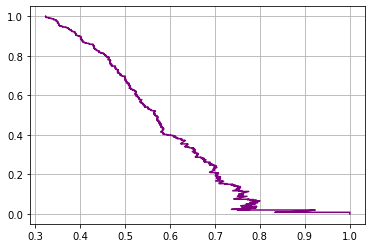

In [21]:
plt.plot(pr, re, color='purple')
plt.grid()

In [22]:
# Вычислим самостоятельно:
# считаем precision, recall вручную
my_pr = []
my_re = []
for threshold in thres:
    pr_re = foo_predict(predictions[:, 1], Y_test, threshold)
    my_pr.append(pr_re[2])
    my_re.append(pr_re[3])

In [23]:
for i in range(10):
    print(my_pr[i], my_re[i], thres[i])

0.32338838572017375 1.0 0.07582923252740358
0.32302771854838475 0.9983525535420099 0.07617596157085887
0.3231999999982763 0.9983525535420099 0.07800501596532203
0.32337246531310904 0.9983525535420099 0.07833731225000234
0.32354511478738096 0.9983525535420099 0.0785865284402309
0.32371794871621945 0.9983525535420099 0.07969132532180427
0.32389096739538276 0.9983525535420099 0.07987106574834414
0.32406417112126173 0.9983525535420099 0.0803136756813152
0.32423756019088157 0.9983525535420099 0.08053860891891546
0.3238758029961249 0.9967051070840197 0.08068797244590134


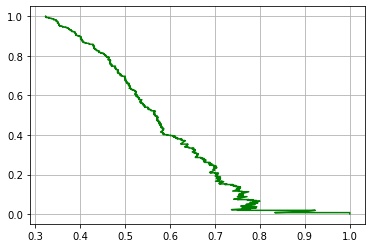

In [25]:
plt.plot(my_pr, my_re, color='green')
plt.grid()

ROC

In [26]:
# посчитаем ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1])
for line in zip(tpr[:3], fpr[:3], thres[:3]):
    print(line)

(0.0, 0.0, 1.9292091224142947)
(0.0016474464579901153, 0.0, 0.9292091224142947)
(0.008237232289950576, 0.0, 0.899988629629782)


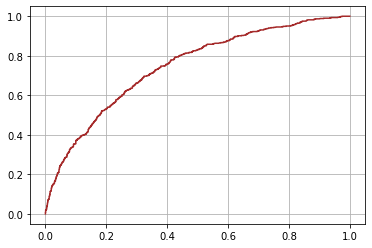

In [27]:
plt.plot(fpr, tpr, color='brown')
plt.grid()

In [28]:
# считаем tpr, fpr вручную
my_tpr = []
my_fpr = []
for threshold in thres:
    tpr_fpr = foo_predict(predictions[:, 1], Y_test, threshold)
    my_tpr.append(tpr_fpr[0])
    my_fpr.append(tpr_fpr[1])

In [31]:
for i in range(5):
    print(my_tpr[i], my_fpr[i], thres[i])

0.0 0.0 1.9292091224142947
0.0016474464579901153 0.0 0.9292091224142947
0.008237232289950576 0.0 0.899988629629782
0.008237232289950576 0.0007674597083653108 0.89773047382835
0.019769357495881382 0.0007674597083653108 0.8650840076748313


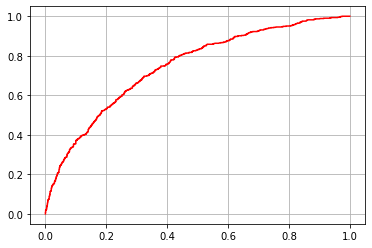

In [32]:
plt.plot(my_fpr, my_tpr, c='red')
plt.grid()

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
roc_auc_score(Y_test, predictions[:, 1])

0.7451629176618145

In [35]:
from sklearn.metrics import auc

In [36]:
auc(fpr, tpr)

0.7451629176618145

Проверям auc:

In [37]:
auc(my_fpr, my_tpr)

0.7451629176618145